<a href="https://colab.research.google.com/github/ajitwankhede/Normalization-in-Machine-learning/blob/main/Normalization_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Normalization in ML?

Normalization is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. It is not necessary for all datasets in a model. It is required only when features of machine learning models have different ranges.


#### Methods of Data Normalization :
1) Decimal Scaling

2) Min-Max Normalization

3) z-Score Normalization(zero-mean Normalization)

Implementing different methods of Data 
normalization:

1. Decimal Scaling
Decimal normalization is a method of normalization in which the given value is normalized by shifting the decimal points of that value. The number of decimal points to move is determined by the absolute maximum value of the given set of data.
If Vi value of attribute A, then Ui is given as,
Decimal Scale Normalization formula:

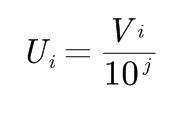

Where, j is the smallest integer such that max|Ui|<1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = { 'A': [29, 49, 680, 798, 55, 88, 97, 597, 309, 23],
        'B': [90,167,1109, 12345, 170, 185,153,342,84, 78],
        'C': [75,140,70,922.5, 1212.5, 12140, 100, 112.5, 195, 2247.5]}

df = pd.DataFrame(data, columns = ['A','B','C'])
df.head()

,A,B,C
0,29,90,75.0
1,49,167,140.0
2,680,1109,70.0
3,798,12345,922.5
4,55,170,1212.5


In [8]:
# Decimal scaling in Python 
def Dec_scale(df):
  for x in df:
    p = df[x].max()
    q = len(str(abs(p)))
    df[x] = df[x]/10**q
  return df

In [9]:
df_decimal = Dec_scale(df.copy())
df_decimal

,A,B,C
0,0.029,0.00090,0.000008
1,0.049,0.00167,0.000014
2,0.680,0.01109,0.000007
3,0.798,0.12345,0.000092
4,0.055,0.00170,0.000121
5,0.088,0.00185,0.001214
6,0.097,0.00153,0.000010
7,0.597,0.00342,0.000011
8,0.309,0.00084,0.000019
9,0.023,0.00078,0.000225


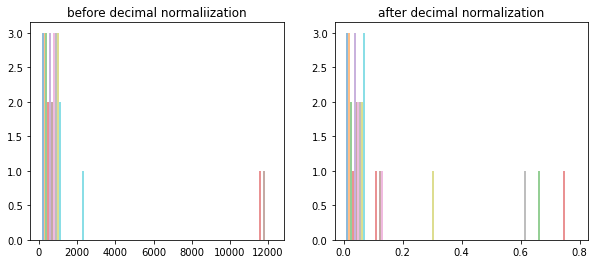

In [19]:
fig,ax = plt.subplots(1,2, figsize =(10, 4))
ax[0].hist(df, alpha = 0.5)
ax[0].set_title("before decimal normaliization")
ax[1].hist(df_decimal, alpha = 0.5)
ax[1].set_title('after decimal normalization')
plt.show()

#### Min-Max normalaization

Also known as min-max scaling or min-max normalization, rescaling is the simplest method and consists in rescaling the range of features to scale the range in 0 to 1 or −1 to 1. Selecting the target range depends on the nature of the data. The general formula for a min-max of 0 to 1 is given as:

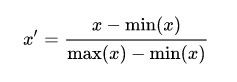

where x is an original value, x' is the normalized value. For example, suppose that we have the students' weight data, and the students' weights span 160 pounds, 200 pounds. To rescale this data, we first subtract 160 from each student's weight and divide the result by 40 (the difference between the maximum and minimum weights)

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_minmax= min_max_scaler.fit_transform(df)

In [21]:
#datafeame after Min-max scaler
df_minmax = pd.DataFrame(df_minmax, columns= ['A', 'B', 'C'])
df_minmax.head()

,A,B,C
0,0.007742,0.000978,0.000414
1,0.033548,0.007255,0.005800
2,0.847742,0.084047,0.000000
3,1.000000,1.000000,0.070630
4,0.041290,0.007500,0.094656


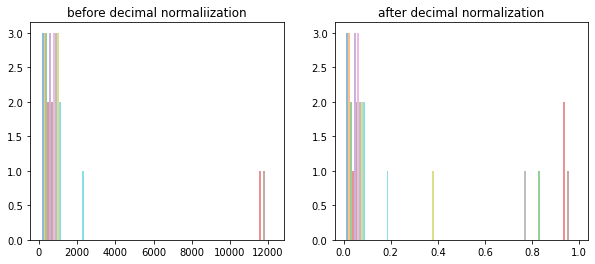

In [22]:
fig,ax = plt.subplots(1,2, figsize =(10, 4))
ax[0].hist(df, alpha = 0.5)
ax[0].set_title("before decimal normaliization")
ax[1].hist(df_minmax, alpha = 0.5)
ax[1].set_title('after decimal normalization')
plt.show()

#### Z-Score Normalization / Standardization (zero-mean Normalization):

Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and artificial neural networks). The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

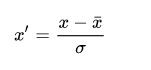

Where x is the original feature vector, x̅ = average(x) is the mean of that feature vector, and 𝜎 is its standard deviation.

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
df_std = sc_X.fit_transform(df)

In [24]:
# Data frame after z-score scalar
df_std = pd.DataFrame(df_std, columns=['A', 'B', 'C'])
df_std.head()

,A,B,C
0,-0.843941,-0.380171,-0.465315
1,-0.774623,-0.358994,-0.446945
2,1.412344,-0.099918,-0.466728
3,1.821318,2.990293,-0.225804
4,-0.753828,-0.358168,-0.143848


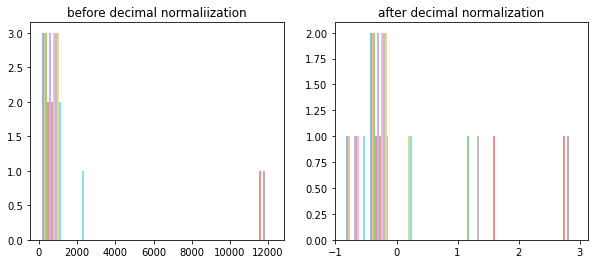

In [26]:
fig,ax = plt.subplots(1,2, figsize =(10, 4))
ax[0].hist(df, alpha = 0.5)
ax[0].set_title("before decimal normaliization")
ax[1].hist(df_std, alpha = 0.5)
ax[1].set_title('after decimal normalization')
plt.show()

Some machine learning algorithms benefit from normalization and standardization, particularly when Euclidean distance is used. For example, if one of the variables in the K-Nearest Neighbor, KNN, is in the 1000s and the other is in the 0.1s, the first variable will dominate the distance rather strongly. In this scenario, normalization and standardization might be beneficial.

#### When to use normalization and standardization:

When you don’t know the distribution of your data or when you know it’s not a Gaussian, normalization is a smart approach to apply. Normalization is useful when your data has variable scales and the technique you’re employing, such as k-nearest neighbors and artificial neural networks, doesn’t make assumptions about the distribution of your data.
The assumption behind standardization is that your data follows a Gaussian (bell curve) distribution. This isn’t required, however, it helps the approach work better if your attribute distribution is Gaussian. When your data has variable dimensions and the technique you’re using (like logistic regression, linear regression, linear discriminant analysis) standardization is useful.
We normalize training data to solve the model learning challenge. We make sure that the various features have similar value ranges (feature scaling) so that gradient descents can converge faster.